In [68]:
import pandas as pd

### Задача 1 
Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)

In [105]:
df = pd.read_csv('default_of_credit_card_clients.csv', sep = ';', header = 1) #TODO
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Задача 2.1 
выведите, что за типы переменных, сколько пропусков

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### Задача 2.2 
для численных значений посчитайте пару статистик (в свободной форме)

In [107]:
df[['AGE','SEX', 'default payment next month']].describe()

,AGE,SEX,default payment next month
count,30000.000000,30000.000000,30000.000000
mean,35.485500,1.603733,0.221200
std,9.217904,0.489129,0.415062
min,21.000000,1.000000,0.000000
25%,28.000000,1.000000,0.000000
50%,34.000000,2.000000,0.000000
75%,41.000000,2.000000,0.000000
max,79.000000,2.000000,1.000000


### Задача 3 
посчитать число женщин с университетским образованием
- SEX (1 = male; 2 = female). 
- EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

In [108]:
len(df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)]) #TODO

8656

In [109]:
df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].SEX.count() #TODO

8656

### Задача 4
Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_

In [110]:
show_cols = [col for col in df.columns if 'BILL_' in col or 'PAY_' in col]
df.groupby(['default payment next month'])[show_cols].median() #TODO

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


### Задача (5) 
постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

In [111]:
d = df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE')
d  #TODO

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,1.500000,1.400000,NaN
1,1.750000,1.545943,1.613306,1.400000
2,1.833333,1.653610,1.581197,1.611111
3,1.727273,1.633695,1.531692,1.650485
4,NaN,1.653846,1.661765,1.666667
5,NaN,1.680000,1.637795,1.666667
6,NaN,1.500000,1.476190,2.000000


### Задача (6) 
Создать новый строковый столбец в data frame-е, который:
- принимает значение A, если значение LIMIT_BAL <=10000
- принимает значение B, если значение LIMIT_BAL <=100000 и >10000
- принимает значение C, если значение LIMIT_BAL <=200000 и >100000
- принимает значение D, если значение LIMIT_BAL <=400000 и >200000
- принимает значение E, если значение LIMIT_BAL <=700000 и >400000
- принимает значение F, если значение LIMIT_BAL >700000

In [112]:


#TODO
def newcol(LIMIT_BAL):
    if LIMIT_BAL <= 10000:
        result = 'A'
    elif 10000 < LIMIT_BAL <= 100000:
        result = 'B'
    elif 100000 < LIMIT_BAL <= 200000:
        result = 'C'
    elif 200000 < LIMIT_BAL <= 400000:
        result = 'D'
    elif 400000 < LIMIT_BAL <= 700000:
        result = 'E'
    else:
        result = 'F'
    return result

df['new_col'] = df['LIMIT_BAL'].map(newcol)
df[['LIMIT_BAL', 'new_col']].head()

,LIMIT_BAL,new_col
0,20000,B
1,120000,C
2,90000,B
3,50000,B
4,50000,B


### Задача (7) 
постироить распределение LIMIT_BAL (гистрограмму)

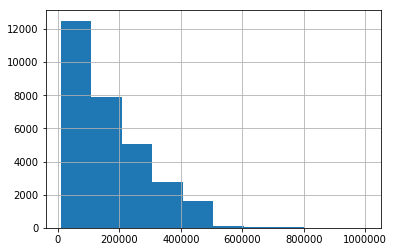

In [113]:
%matplotlib inline
from matplotlib import pyplot as plt
df['LIMIT_BAL'].hist() #TODO

### Задача (8) 
построить зависимость кредитного лимита от образования для каждого пола
график необходимо сделать очень широким (на весь экран)

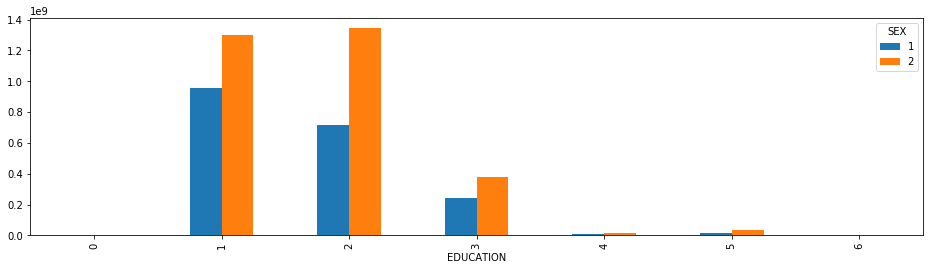

In [114]:
fig, ax = plt.subplots(figsize=(16,4))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'sum').plot(kind='bar', stacked=False, ax=ax)

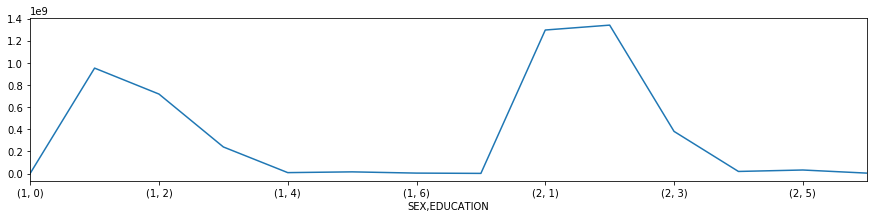

In [115]:
fplot = df.groupby(['SEX','EDUCATION'])['LIMIT_BAL'].sum()
fplot.plot(figsize=(15,3))
plt.show()

### Задача 9
построить зависимость кредитного лимита и образования только для одного из полов

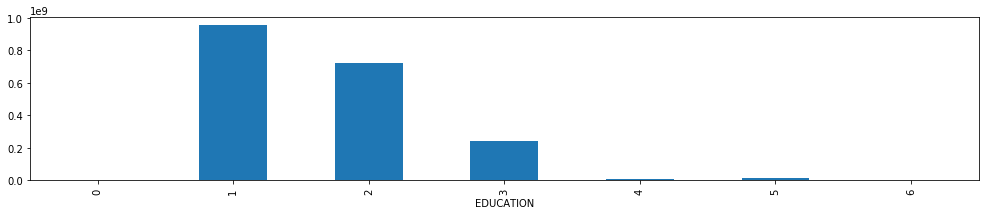

In [116]:

#TODO
plt.rcParams['axes.formatter.useoffset'] = False
fplot2 = df[df.SEX == 1].groupby(['EDUCATION'])['LIMIT_BAL'].sum()
fplot2.plot(kind='bar',figsize=(17,3))

### Задача (10)
 построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
разным цветом выделить разные значение "default payment next month"

- но так как столбцов много - картинка может получиться "монструозной"
- поэкспериментируйте над тем как построить подобное сравнение параметров
*подсказка - ответ может состоять из несколькольких графиков*
(если не выйдет - программа минимум - построить один график со всеми параметрами)

In [122]:
import pandas as pd #для эксперимента
df = pd.read_csv('default_of_credit_card_clients.csv', sep = ';', header = 1) #TODO

In [118]:
def newcol(LIMIT_BAL): #для эксперимента
    if LIMIT_BAL <= 10000:
        result = 1
    elif 10000 < LIMIT_BAL <= 100000:
        result = 2
    elif 100000 < LIMIT_BAL <= 200000:
        result = 3
    elif 200000 < LIMIT_BAL <= 400000:
        result = 4
    elif 400000 < LIMIT_BAL <= 700000:
        result = 5
    else:
        result = 6
    return result

df['LIMIT_BAL_ID'] = df['LIMIT_BAL'].map(newcol)

In [119]:
df2 = df.loc[:,'SEX':'LIMIT_BAL_ID'] #обрежем

In [130]:
#для эксперимента, вряд ли в этом есть смысл
col_list_pay= [x for x in list(df2) if 'PAY_' in x and 'AMT' not in x]
df2['PAY_AGG'] = df2.median(axis=1)

col_list_pay_amt = [x for x in list(df2) if 'PAY_' in x and 'AMT' in x]
df2['PAY_AMT_AGG'] = df2.median(axis=1)

col_list_pay_amt = [x for x in list(df2) if 'BILL_' in x]
df2['BILL_AGG'] = df2.median(axis=1)

In [131]:
df3 = df2[['BILL_AGG', 'PAY_AMT_AGG', 'PAY_AGG', 'LIMIT_BAL_ID','SEX'
           , 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment next month' ]]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
BILL_AGG                      30000 non-null float64
PAY_AMT_AGG                   30000 non-null float64
PAY_AGG                       30000 non-null float64
LIMIT_BAL_ID                  30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
default payment next month    30000 non-null int64
dtypes: float64(3), int64(6)
memory usage: 2.1 MB


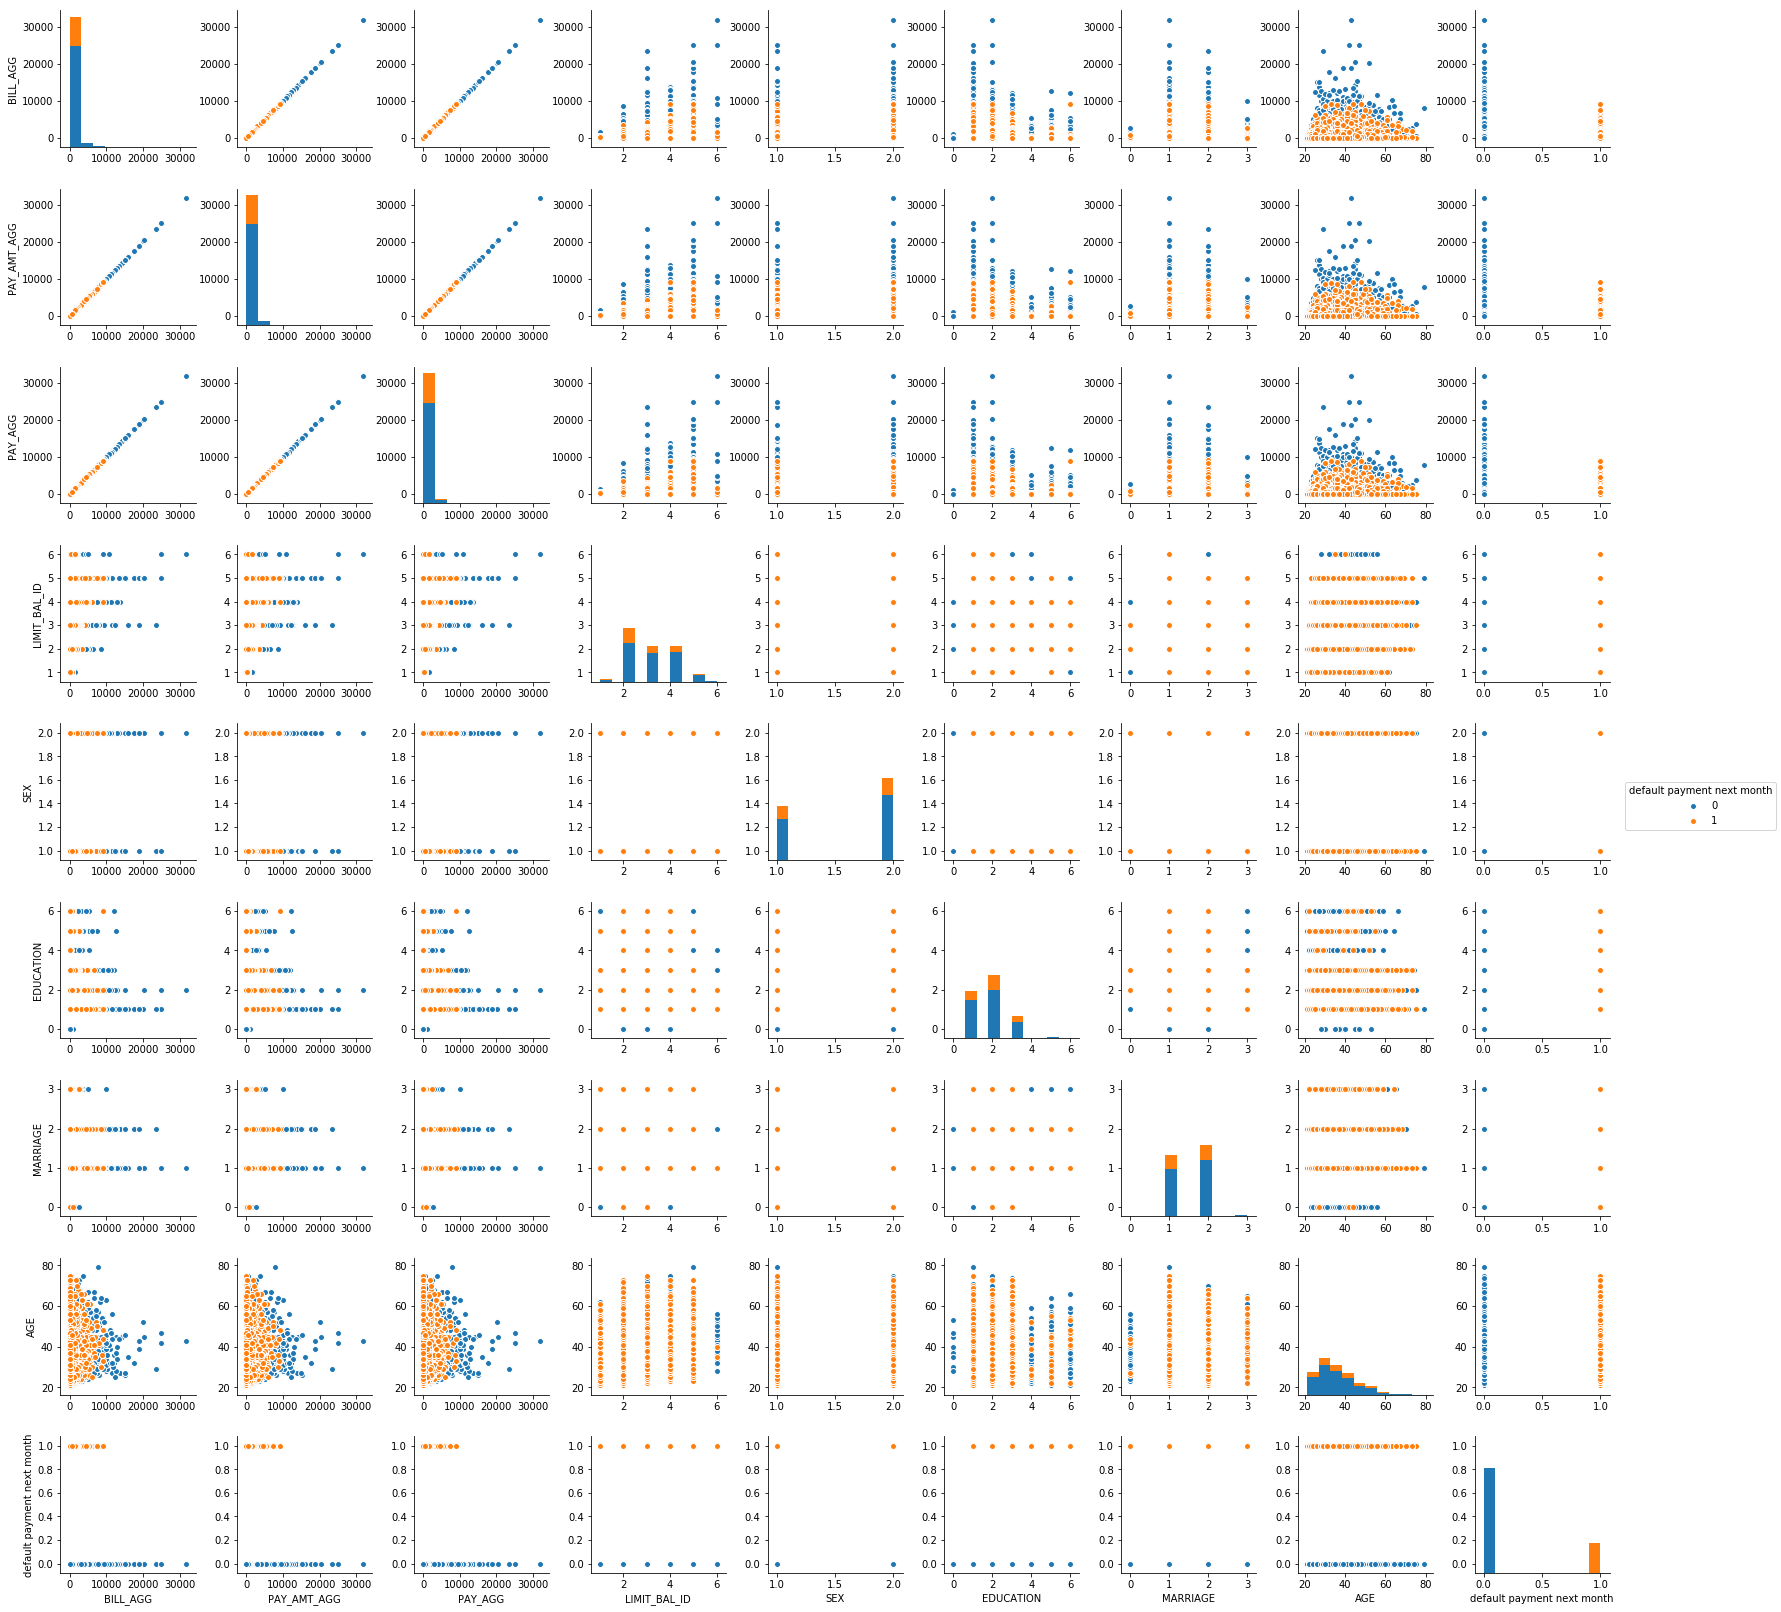

In [128]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.pairplot(df3, hue='default payment next month')
plt.show()
#TODO

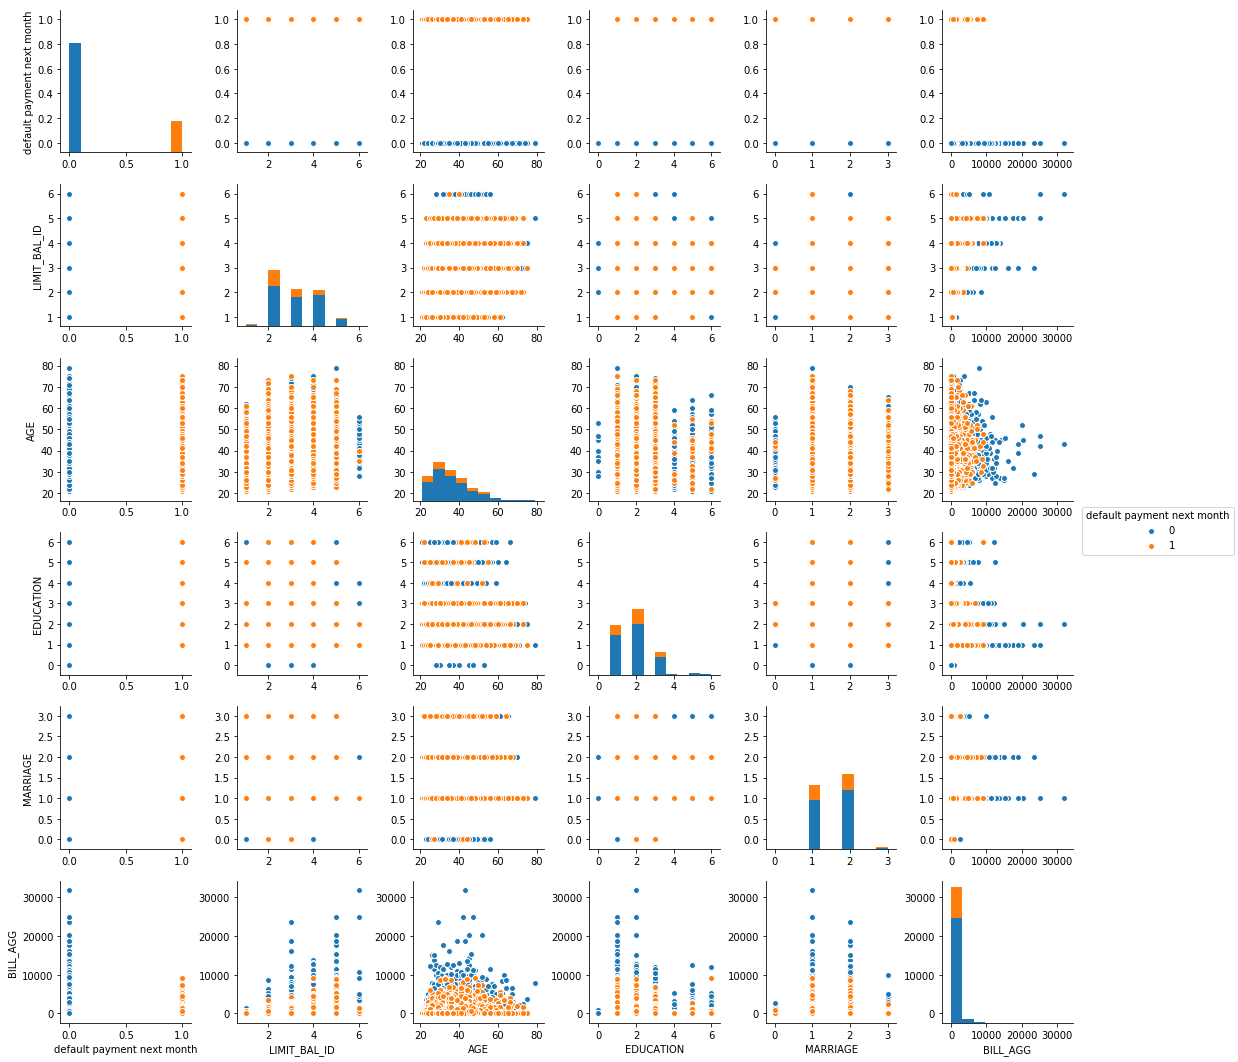

In [129]:
cols = ['default payment next month', 'LIMIT_BAL_ID', 'AGE', 'EDUCATION', 'MARRIAGE', 'BILL_AGG']
sns_plot = sns.pairplot(df3[cols], hue='default payment next month')
plt.show()